In [3]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from keras.optimizers import SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

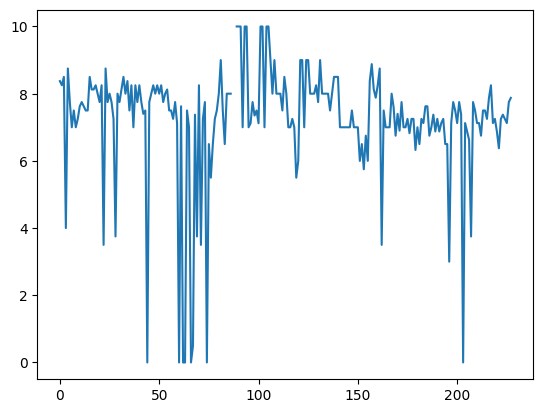

In [4]:
df = pd.concat(map(pd.read_csv,['./diemthi.csv','./lop71.csv','./lop72.csv']), ignore_index=True)
plt.plot(df['10%'])
plt.show()
# normalization data
df.to_csv('./diem.csv')

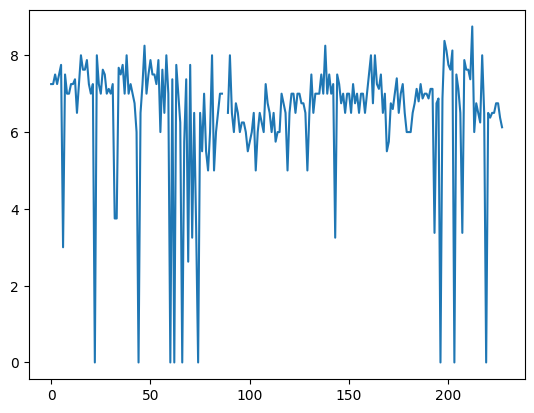

In [5]:
plt.plot(df['20%_1'])
plt.show()

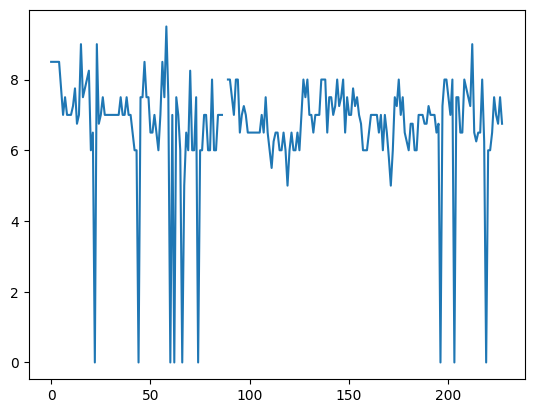

In [6]:
plt.plot(df['20%_2'])
plt.show()

        10%  20%_1  20%_2   Thi
0    0.8375  1.450   1.70  4.50
1    0.8250  1.450   1.70  4.50
2    0.8500  1.500   1.70  5.00
3    0.4000  1.450   1.70  4.50
4    0.8750  1.500   1.70  4.75
..      ...    ...    ...   ...
223  0.7375  1.300   1.50  3.50
224  0.7250  1.350   1.40  3.50
225  0.7125  1.350   1.35  3.50
226  0.7750  1.275   1.50  3.50
227  0.7875  1.225   1.35  3.50

[228 rows x 4 columns]
['20%_2', 'Thi']


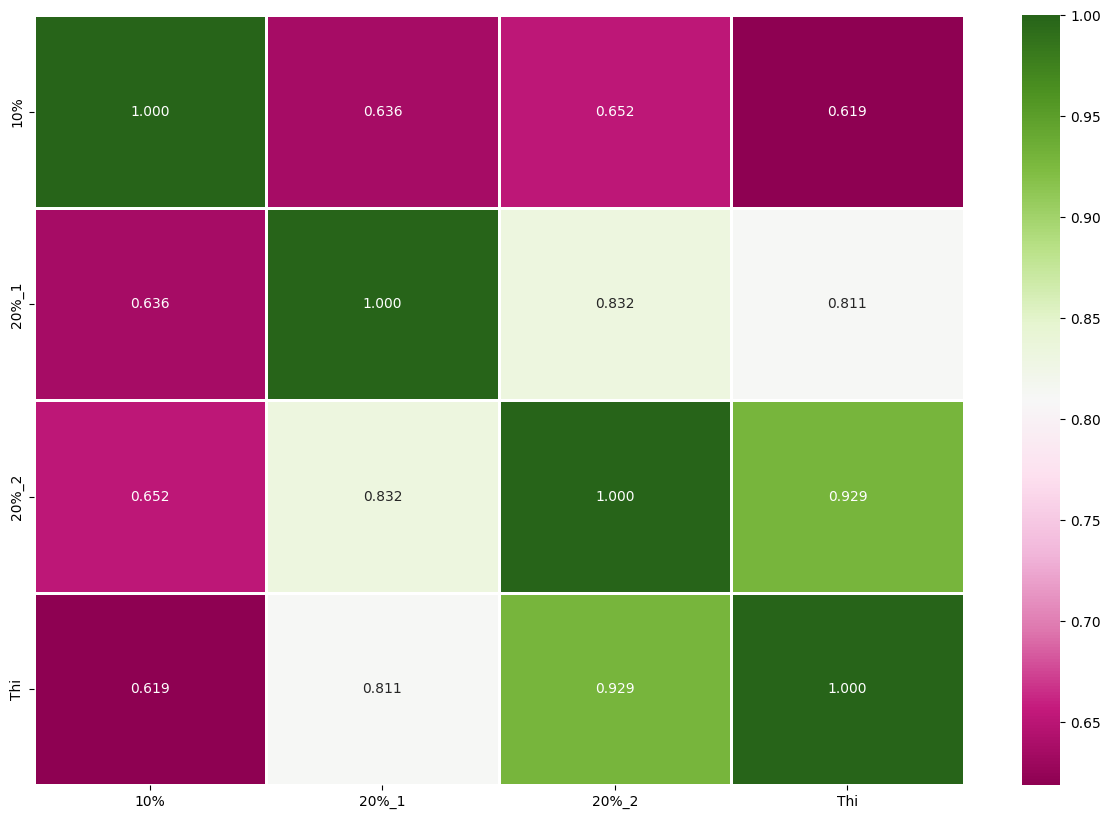

        10%  20%_1  20%_2
0    0.8375  1.450   1.70
1    0.8250  1.450   1.70
2    0.8500  1.500   1.70
3    0.4000  1.450   1.70
4    0.8750  1.500   1.70
..      ...    ...    ...
223  0.7375  1.300   1.50
224  0.7250  1.350   1.40
225  0.7125  1.350   1.35
226  0.7750  1.275   1.50
227  0.7875  1.225   1.35

[228 rows x 3 columns]
      Thi
0    4.50
1    4.50
2    5.00
3    4.50
4    4.75
..    ...
223  3.50
224  3.50
225  3.50
226  3.50
227  3.50

[228 rows x 1 columns]
0.0766547902967347
0.8823064144044926
      predict  actual
215  3.252782   3.000
66   0.011238   0.000
9    3.499591   3.750
200  3.766242   4.000
15   4.410878   4.500
197  3.591810   3.500
25   3.503008   3.750
193  3.203632   3.250
154  3.703301   3.625
126  3.482597   3.500
212  4.464139   4.250
19   4.038387   4.000
96   3.437766   3.250
177  3.725989   3.750
221  3.032604   2.500
137  3.914982   4.000
146  3.684029   3.250
30   3.501869   3.500
223  3.665326   3.500
184  3.099531   2.500
108  3.733961   3.75

In [36]:
df = pd.read_csv('./diem.csv')
# xử lý dữ liệu
data = df.fillna(df.mean(), inplace=True)

data10 = df['10%'] * 0.1
data20_1 = df['20%_1'] * 0.2
data20_2 = df['20%_2'] * 0.2
dataThi = df['Thi'] * 0.5
data = pd.DataFrame({'10%':data10,'20%_1':data20_1,'20%_2':data20_2,'Thi':dataThi})
print(data)
data.to_csv('datafinal.csv', index=False)

# xóa hàng trùng nhau
cols_other_than_id = list(data.columns)[2:]
print(cols_other_than_id)
# data.drop_duplicates(subset=cols_other_than_id, keep='first', inplace=True)

# lưu lại dữ liệu
data.to_csv("./data.csv")

# tính toán độ tương quan và vẽ biểu đồ
corr= data.corr()
import seaborn as sns
corr = pd.DataFrame(corr,columns=corr.keys(),index=corr.keys())
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, annot=True, cmap='PiYG', linewidths=1, linecolor='white', fmt='.3f',ax=ax)
plt.show()

# select features
X = data.iloc[:, 0:3]
y = data.iloc[:, 3:]
print(X)
print(y)
# chia dữ liệu thành 2 phần train và test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# sử dụng linear regression để dự đoán
model = LinearRegression()
model.fit(X_train,y_train)
yhat = model.predict(X_test)

# tính toán độ lệnh và độ chính xác
print(mean_squared_error(y_test,yhat))
print(r2_score(yhat,y_test))
print(pd.DataFrame({'predict':yhat.flatten(),'actual':y_test['Thi']}))

In [38]:
#model 1
df = pd.read_csv('./data.csv')
# data = df.fillna(df.mean())
X = data.iloc[:, 0:3]
print(X)
y = data.iloc[:, 3:]
print(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape)

model = Sequential()
model.add(Dense(16, input_shape=(3,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5000, batch_size=32)

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(model.history.history['mae'], label='mae')
plt.plot(model.history.history['val_mae'], label='val_mae')
plt.show()
model.save('model1.h5')


from sklearn.metrics import mean_squared_error
# y_pre = pd.DataFrame(yhat,columns=['predict'])
yhat = model.predict([X_test])

# print(model.predict([X_test]))
# print(pd.DataFrame({'predict':yhat.flatten(),'actual':y_test['Thi']}))
print("Độ sai",mean_squared_error(y_test, yhat))
# r2 > 1 kết quả không rõ ràng
from sklearn.metrics import r2_score
print("Độ tin cậy",r2_score(y_test, yhat,force_finite=False)) 

        10%  20%_1  20%_2
0    0.8375  1.450   1.70
1    0.8250  1.450   1.70
2    0.8500  1.500   1.70
3    0.4000  1.450   1.70
4    0.8750  1.500   1.70
..      ...    ...    ...
223  0.7375  1.300   1.50
224  0.7250  1.350   1.40
225  0.7125  1.350   1.35
226  0.7750  1.275   1.50
227  0.7875  1.225   1.35

[228 rows x 3 columns]
      Thi
0    4.50
1    4.50
2    5.00
3    4.50
4    4.75
..    ...
223  3.50
224  3.50
225  3.50
226  3.50
227  3.50

[228 rows x 1 columns]
(182, 3) (182, 1) (23, 3) (23, 1) (23, 3) (23, 1)
Epoch 1/5000
6/6 [==============================] - 1s 33ms/step - loss: 8.8041 - mae: 2.8813 - val_loss: 8.3677 - val_mae: 2.7836
Epoch 2/5000
6/6 [==============================] - 0s 12ms/step - loss: 8.1748 - mae: 2.7763 - val_loss: 7.7792 - val_mae: 2.6831
Epoch 3/5000
6/6 [==============================] - 0s 10ms/step - loss: 7.6171 - mae: 2.6794 - val_loss: 7.2677 - val_mae: 2.5921
Epoch 4/5000
6/6 [==============================] - 0s 9ms/step - loss: 7.124

KeyboardInterrupt: 

(182, 3) (182, 1) (23, 3) (23, 1) (23, 3) (23, 1)
Epoch 1/100
6/6 [==============================] - 0s 30ms/step - loss: 10.1202 - mae: 3.0912 - val_loss: 9.5098 - val_mae: 2.9717
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 9.2290 - mae: 2.9517 - val_loss: 8.6271 - val_mae: 2.8282
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 8.3369 - mae: 2.8053 - val_loss: 7.7464 - val_mae: 2.6776
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 7.4554 - mae: 2.6511 - val_loss: 6.8529 - val_mae: 2.5157
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 6.5583 - mae: 2.4853 - val_loss: 5.9380 - val_mae: 2.3382
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 5.6437 - mae: 2.3030 - val_loss: 5.0076 - val_mae: 2.1424
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 4.7046 - mae: 2.1010 - val_loss: 4.0848 - val_mae: 1.9286
Epoch 8/100
6/6 [=======================

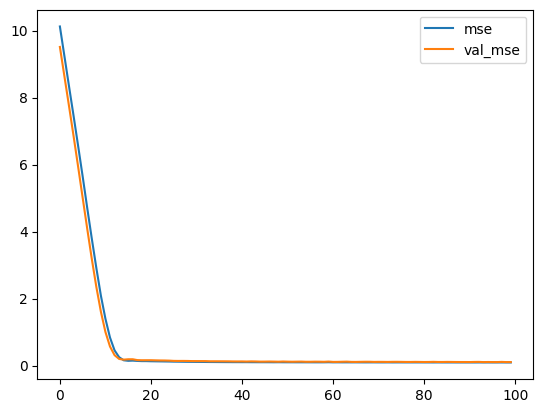

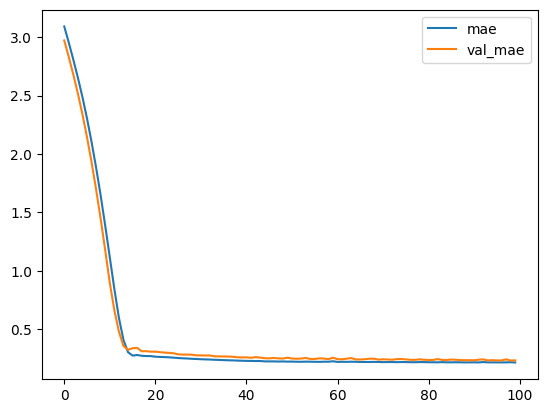

1/1 [==============================] - 0s 51ms/step
       Thi
215  3.000
195  3.375
84   3.500
197  3.500
19   4.000
45   3.750
66   0.000
93   3.500
162  3.500
9    3.750
16   3.875
180  3.000
159  2.500
212  4.250
216  3.250
223  3.500
112  2.750
108  3.750
193  3.250
143  3.625
221  2.500
104  3.250
82   3.000
Độ sai 0.060201692406349275
Độ tin cậy 0.9094460414914981


In [41]:
#model 2
df = pd.read_csv('./data.csv')
X = data.iloc[:, 0:3]
y = data.iloc[:, 3:]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape)

model = Sequential()
model.add(Dense(64, input_shape=(3,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

plt.plot(model.history.history['loss'], label='mse')
plt.plot(model.history.history['val_loss'], label='val_mse')
plt.legend()
plt.show()

plt.plot(model.history.history['mae'], label='mae')
plt.plot(model.history.history['val_mae'], label='val_mae')
plt.legend()
plt.show()
model.save('model1.h5')


from sklearn.metrics import mean_squared_error
# y_pre = pd.DataFrame(yhat,columns=['predict'])
yhat = model.predict([X_test])

# print(model.predict([X_test]))
# print(pd.DataFrame({'predict':yhat.flatten(),'actual':y_test['Thi']}))
print(y_test)
print("Độ sai",mean_squared_error(y_test, yhat))

from sklearn.metrics import r2_score
print("Độ tin cậy",r2_score(y_test, yhat))

(182, 3) (182, 1) (23, 3) (23, 1) (23, 3) (23, 1)
Epoch 1/100
6/6 [==============================] - 1s 35ms/step - loss: 77.4971 - mae: 8.5610 - val_loss: 69.8202 - val_mae: 8.0574
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 65.5603 - mae: 7.8669 - val_loss: 59.2680 - val_mae: 7.4072
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 55.5259 - mae: 7.2338 - val_loss: 49.9939 - val_mae: 6.7889
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 46.7134 - mae: 6.6288 - val_loss: 41.6279 - val_mae: 6.1818
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 38.6274 - mae: 6.0269 - val_loss: 33.9431 - val_mae: 5.5656
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 31.4053 - mae: 5.4195 - val_loss: 27.0335 - val_mae: 4.9480
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 24.8846 - mae: 4.8138 - val_loss: 21.3587 - val_mae: 4.3790
Epoch 8/100
6/6 [=========

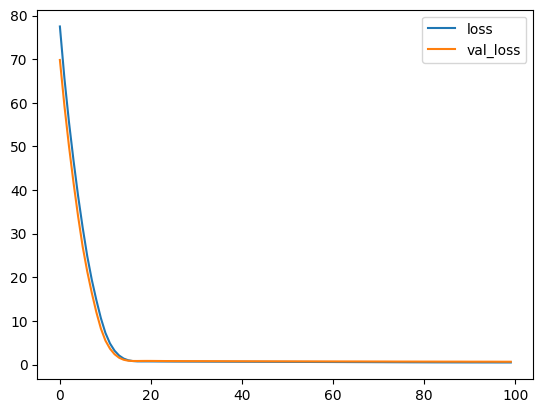

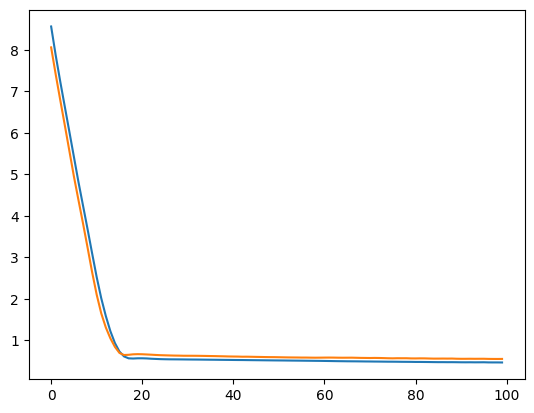

1/1 [==============================] - 0s 55ms/step
Độ sai 0.5280029866378686
Độ tin cậy 0.8014476062332095


In [37]:
#model 3
df = pd.read_csv('./diem.csv')
data = df.fillna(df.mean())
X = data.iloc[:, 2:5]
y = data.iloc[:, 5:]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape)

model = Sequential()
model.add(Dense(16, input_shape=(3,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(model.history.history['mae'], label='mae')
plt.plot(model.history.history['val_mae'], label='val_mae')
plt.show()
model.save('model1.h5')


from sklearn.metrics import mean_squared_error
# y_pre = pd.DataFrame(yhat,columns=['predict'])
yhat = model.predict([X_test])

# print(model.predict([X_test]))
# print(pd.DataFrame({'predict':yhat.flatten(),'actual':y_test['Thi']}))
print("Độ sai",mean_squared_error(y_test, yhat))

from sklearn.metrics import r2_score
print("Độ tin cậy",r2_score(y_test, yhat))

In [ ]:
#model 3
df = pd.read_csv('./diem.csv')
data = df.fillna(df.mean())
X = data.iloc[:, 2:5]
y = data.iloc[:, 5:]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape)

model = Sequential()
model.add(Dense(16, input_shape=(3,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(model.history.history['mae'], label='mae')
plt.plot(model.history.history['val_mae'], label='val_mae')
plt.show()
model.save('model1.h5')


from sklearn.metrics import mean_squared_error
# y_pre = pd.DataFrame(yhat,columns=['predict'])
yhat = model.predict([X_test])

# print(model.predict([X_test]))
# print(pd.DataFrame({'predict':yhat.flatten(),'actual':y_test['Thi']}))
print("Độ sai",mean_squared_error(y_test, yhat))

from sklearn.metrics import r2_score
print("Độ tin cậy",r2_score(y_test, yhat))

(182, 3) (182, 1) (23, 3) (23, 1) (23, 3) (23, 1)
Epoch 1/100
182/182 [==============================] - 1s 4ms/step - loss: 0.8077 - mae: 0.6109 - val_loss: 0.6639 - val_mae: 0.5922
Epoch 2/100
182/182 [==============================] - 1s 3ms/step - loss: 0.5339 - mae: 0.5199 - val_loss: 0.5290 - val_mae: 0.5482
Epoch 3/100
182/182 [==============================] - 1s 3ms/step - loss: 0.4955 - mae: 0.5031 - val_loss: 0.8241 - val_mae: 0.7456
Epoch 4/100
182/182 [==============================] - 1s 3ms/step - loss: 0.4589 - mae: 0.4937 - val_loss: 0.4507 - val_mae: 0.5230
Epoch 5/100
182/182 [==============================] - 1s 3ms/step - loss: 0.4661 - mae: 0.4971 - val_loss: 0.4815 - val_mae: 0.5168
Epoch 6/100
182/182 [==============================] - 1s 3ms/step - loss: 0.4400 - mae: 0.4881 - val_loss: 0.4310 - val_mae: 0.5191
Epoch 7/100
182/182 [==============================] - 1s 3ms/step - loss: 0.4225 - mae: 0.4717 - val_loss: 0.4040 - val_mae: 0.5068
Epoch 8/100
182/182

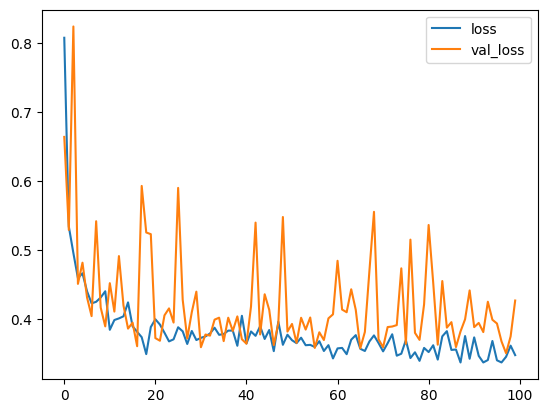

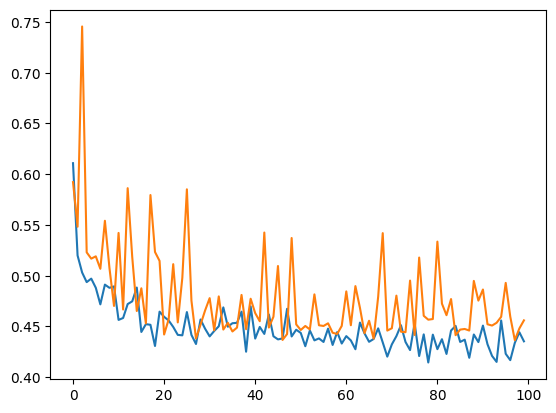

1/1 [==============================] - 0s 67ms/step
Độ sai 0.30567057143788273
Độ tin cậy 0.8850543932534992


In [49]:
#model1_batch_size=1
df = pd.read_csv('./diem.csv')
data = df.fillna(df.mean())
X = data.iloc[:, 2:5]
y = data.iloc[:, 5:]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape)

model = Sequential()
model.add(Dense(16, input_shape=(3,), activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=1)

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(model.history.history['mae'], label='mae')
plt.plot(model.history.history['val_mae'], label='val_mae')
plt.show()
model.save('model1.h5')


from sklearn.metrics import mean_squared_error
# y_pre = pd.DataFrame(yhat,columns=['predict'])
yhat = model.predict([X_test])

# print(model.predict([X_test]))
# print(pd.DataFrame({'predict':yhat.flatten(),'actual':y_test['Thi']}))
print("Độ sai",mean_squared_error(y_test, yhat))

from sklearn.metrics import r2_score
print("Độ tin cậy",r2_score(y_test, yhat))

(182, 3) (182, 1) (23, 3) (23, 1) (23, 3) (23, 1)
Epoch 1/300
6/6 [==============================] - 5s 78ms/step - loss: 40.5408 - mae: 6.1757 - val_loss: 33.9042 - val_mae: 5.5980
Epoch 2/300
6/6 [==============================] - 0s 19ms/step - loss: 29.8635 - mae: 5.2922 - val_loss: 22.9512 - val_mae: 4.5795
Epoch 3/300
6/6 [==============================] - 0s 21ms/step - loss: 18.2694 - mae: 4.1126 - val_loss: 10.7496 - val_mae: 3.0695
Epoch 4/300
6/6 [==============================] - 0s 18ms/step - loss: 6.7091 - mae: 2.3857 - val_loss: 1.7298 - val_mae: 1.1250
Epoch 5/300
6/6 [==============================] - 0s 20ms/step - loss: 1.0579 - mae: 0.7958 - val_loss: 2.1939 - val_mae: 1.2775
Epoch 6/300
6/6 [==============================] - 0s 20ms/step - loss: 2.3794 - mae: 1.3957 - val_loss: 2.3118 - val_mae: 1.3249
Epoch 7/300
6/6 [==============================] - 0s 20ms/step - loss: 1.1570 - mae: 0.8663 - val_loss: 0.7138 - val_mae: 0.6206
Epoch 8/300
6/6 [=================

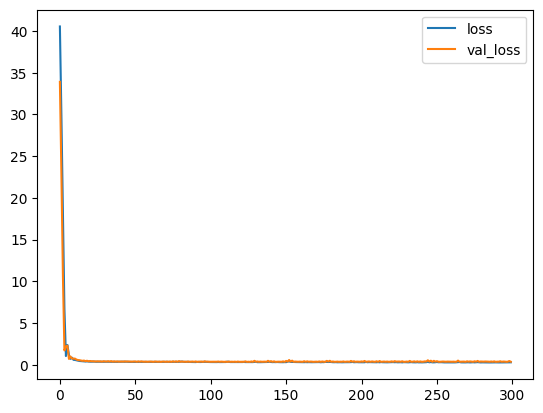

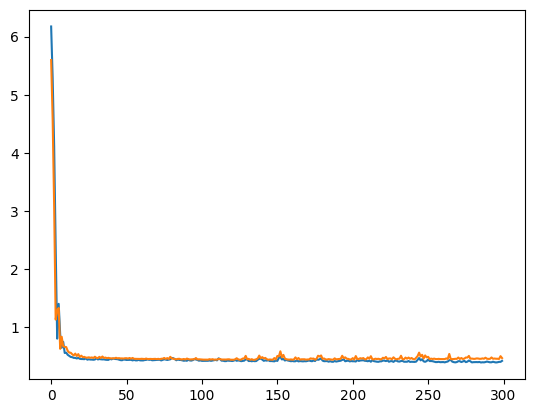

In [4]:
#model1_batch_size=1
df = pd.read_csv('./diem.csv')
data = df.fillna(df.mean())
X = data.iloc[:, 2:5]
y = data.iloc[:, 5:]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape)

model = Sequential()
model.add(Dense(128, input_shape=(3,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=32)

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(model.history.history['mae'], label='mae')
plt.plot(model.history.history['val_mae'], label='val_mae')
plt.show()
model.save('model1.h5')


In [5]:

# y_pre = pd.DataFrame(yhat,columns=['predict'])
yhat = model.predict([X_test])

# print(model.predict([X_test]))
print(pd.DataFrame({'predict':yhat.flatten(),'actual':y_test['Thi']}))
print("Độ sai",mean_squared_error(y_test, yhat))

from sklearn.metrics import r2_score
print("Độ tin cậy",r2_score(y_test, yhat))

1/1 [==============================] - 0s 130ms/step
      predict  actual
215  6.341470    6.00
195  6.499475    6.75
84   6.652601    7.00
197  6.888857    7.00
19   7.789016    8.00
45   7.057879    7.50
66  -0.002922    0.00
93   7.238899    7.00
162  7.285135    7.00
9    6.788551    7.50
16   7.387897    7.75
180  5.832134    6.00
159  6.251905    5.00
212  8.753531    8.50
216  6.168640    6.50
223  7.052696    7.00
112  6.197480    5.50
108  7.187294    7.50
193  7.000569    6.50
143  7.311917    7.25
221  5.917766    5.00
104  5.809391    6.50
82   5.344771    6.00
Độ sai 0.24728584758964248
Độ tin cậy 0.9070096226231236
